# Logistic Regression

Here is logistic regression to sats.csv. We have 3 collumns:
* exam 1 
* exam 2 
* and if it's submitted.

![title](exam.jpg)

#### Initialize

In [134]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [135]:
df=pd.read_csv("sats.csv")
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [136]:
df.head()

,exam1,exam2,submitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [137]:
df.describe()

,exam1,exam2,submitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


### Plot

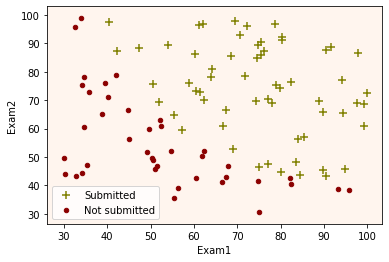

In [138]:
pos , neg = (y==1).reshape(100,1) , (y==0).reshape(100,1)
fig = plt.figure(1)
ax = fig.add_subplot(111, facecolor='#FFF5EE')
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="#808000",marker="+", s=50)
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],c="#8B0000",marker="o",s=20)
plt.xlabel("Exam1")
plt.ylabel("Exam2")
plt.legend(["Submitted","Not submitted"])

### Sigmoid 
formula:

$ g(z) = \frac{1}{(1+e^{-z})}$

In [139]:
def sigmoid(z):
    g=1/ (1 + np.exp(-z))
    return g

### Compute the Cost Function and Gradient

$J(\Theta) = \frac{1}{m} \sum_{i=1}^{m} [ -y^{(i)}log(h_{\Theta}(x^{(i)})) - (1 - y^{(i)})log(1 - (h_{\Theta}(x^{(i)}))]$

$ \frac{\partial J(\Theta)}{\partial \Theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\Theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$

In [140]:
def costFunction(theta, X, y):
    m=len(y)
    predictions = sigmoid(np.dot(X,theta))
    error = (-y * np.log(predictions)) - ((1-y)*np.log(1-predictions))
    # cost func
    cost = 1/m * sum(error)
    # drad func
    grad = 1/m * np.dot(X.transpose(),(predictions - y))
    
    return cost[0] , grad

### Features normalization

In [141]:
def featureNormalization(X):
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    
    X_norm = (X - mean)/std
    
    return X_norm , mean , std

In [142]:
m , n = X.shape[0], X.shape[1]
X, X_mean, X_std = featureNormalization(X)
X= np.append(np.ones((m,1)),X,axis=1)
y=y.reshape(m,1)
initial_theta = np.zeros((n+1,1))
cost, grad= costFunction(initial_theta,X,y)
print("Cost of theta 0")
print(cost)
print("Gradient on theta 0:")
print(grad)

Cost of theta 0
0.693147180559946
Gradient on theta 0:
[[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


### Gradient Descent

In [143]:
def gradientDescent(X,y,theta,alpha,num_iters):
    m=len(y)
    J_history =[]
    
    for i in range(num_iters):
        cost, grad = costFunction(theta,X,y)
        theta = theta - (alpha * grad)
        J_history.append(cost)
    
    return theta , J_history

In [144]:
theta , J_history = gradientDescent(X,y,initial_theta,1,400)

In [145]:
print("Theta optimized by gradient descent:",theta)
print("The cost of the optimized theta:",J_history[-1])

Theta optimized by gradient descent: [[1.65947664]
 [3.8670477 ]
 [3.60347302]]
The cost of the optimized theta: 0.20360044248226664


### Plotting of Cost Function

Text(0.5, 1.0, 'Cost function using Gradient Descent')

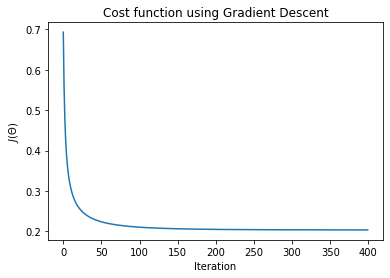

In [146]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

### Plotting the decision boundary
* $h_\Theta(x) = g(z)$, where g is the sigmoid function and $z = \Theta^Tx$
* Since $h_\Theta(x) \geq 0.5$ is interpreted as predicting class "1", $g(\Theta^Tx) \geq 0.5$ or $\Theta^Tx \geq 0$ predict class "1" 
* $\Theta_1 + \Theta_2x_2 + \Theta_3x_3 = 0$ is the decision boundary   


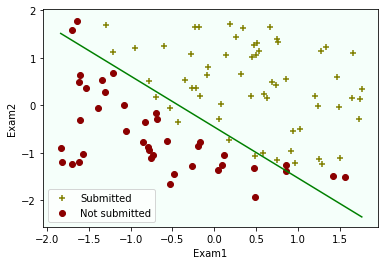

In [147]:
fig = plt.figure(1)
ax = fig.add_subplot(111, facecolor='#F5FFFA')
plt.scatter(X[pos[:,0],1],X[pos[:,0],2],c="#808000",marker="+",label="Submitted")
plt.scatter(X[neg[:,0],1],X[neg[:,0],2],c="#8B0000",marker="o",label="Not submitted")
x_value= np.array([np.min(X[:,1]),np.max(X[:,1])])
y_value=-(theta[0] +theta[1]*x_value)/theta[2]
plt.plot(x_value,y_value, "g")
plt.xlabel("Exam1")
plt.ylabel("Exam2")
plt.legend(loc=0)

### Prediction

So in summary we can predict an admission probability according to score of exams

In [148]:
def classifierPredict(theta,X):
    predictions = X.dot(theta)
    
    return predictions>0

Let's try with exta **low** score
* FirstExam = 5
* SecondExam = 10

In [149]:
x_test = np.array([5,10])
x_test = (x_test - X_mean)/X_std
x_test = np.append(np.ones(1),x_test)
prob = sigmoid(x_test.dot(theta))
print("An admission probability of",prob[0])

An admission probability of 5.029020052370503e-10


So it's little chance but what if we have
* FirstExam = 50
* SecondExam = 50

In [150]:
x_test = np.array([50,50])
x_test = (x_test - X_mean)/X_std
x_test = np.append(np.ones(1),x_test)
prob = sigmoid(x_test.dot(theta))
print("An admission probability of",prob[0])

An admission probability of 0.009691231993406983


Finally let's try **high** score
* FirstExam = 80
* SecondExam = 99

In [151]:
x_test = np.array([80,99])
x_test = (x_test - X_mean)/X_std
x_test = np.append(np.ones(1),x_test)
prob = sigmoid(x_test.dot(theta))
print("An admission probability of",prob[0])

An admission probability of 0.9999818169441534


### Accuracy on training set 

In [133]:
p=classifierPredict(theta,X)
print("Train Accuracy:", sum(p==y)[0],"%")

Train Accuracy: 89 %
